Now that you've spent some time tinkering with an example Naive Bayes Classifier, it's time to build your own.

We've mentioned that Naive Bayes is particularly good for text classification problems. Before we made a spam filter. Now we'll perform a sentiment analysis, classifying whether feedback left on a website is either positive or negative.

Again the UCI Machine Learning database has a nice labeled dataset of sentiment labelled sentences for us to use. This dataset was created for the paper From Group to Individual Labels using Deep Features, Kotzias et. al., KDD 2015.

Pick one of the company data files and build your own classifier. When you're satisfied with its performance (at this point just using the accuracy measure shown in the example), test it on one of the other datasets to see how well these kinds of classifiers translate from one context to another.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# IMDB dataset

Let's import the IMDB dataset from the UC Irvine's [Sentiment Labelled Sentences](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences)

# Goal

- Build my own Naive Bayes classifier and assess its performance.
- Test the classifier against another dataset to see how it performs from one context to another.

In [2]:
import os 
path = "/home/kaneeshadawood/imdb_labelled.txt"

In [3]:
# Loading the dataset:
data_path = ("/home/kaneeshadawood/imdb_labelled.txt")
data = pd.read_csv(data_path, delimiter= '\t', header=None)

#Score is either 1 (for positive) or 0 (for negative)
data.columns = ['review', 'score']

In [4]:
# Let's take a look at the data:
data.head(50)

,review,score
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
5,"The rest of the movie lacks art, charm, meanin...",0
6,Wasted two hours.,0
7,Saw the movie today and thought it was a good ...,1
8,A bit predictable.,0
9,Loved the casting of Jimmy Buffet as the scien...,1


In [6]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 2 columns):
review    748 non-null object
score     748 non-null int64
dtypes: int64(1), object(1)
memory usage: 11.8+ KB


In [21]:
values = data['score'].value_counts()
values

1    386
0    362
Name: score, dtype: int64

In [25]:
# Ratio of reviews:
values/data['score'].value_counts().sum()

1    0.516043
0    0.483957
Name: score, dtype: float64

It is evident that 51% of the reviews in IMDB dataset were good reviews (386/748).

Let's now engineer features from our review field. I am choosing positive keywords to see how well the viewers enjoyed the movies on IMDB

In [26]:
# Engineering features to the Review field
keywords = ['good', 'great', 'fun', 'recommended', 'amazing', 'excellent', 'wonderful', 'adorable', 'decent', 'hilarious',
            'right', 'cool', 'awesome', 'interesting', 'superb', 'perfect']

# Let's choose some keywords and add spaces around the key so we're getting the word and not pattern matching.

for key in keywords:
    data[str(key)] = data.review.str.contains(' ' + str(key) + ' ', case=False)
    data[str(key)] = data.review.str.contains((str(key) + ' '), case=False)
    data[str(key)] = data.review.str.contains((' ' + str(key)), case=False)

Next, I will use a different feature option to see if the review is all uppercase.

In [30]:
# Let's find if all the reviews are uppercase:
data['allcaps'] = data.review.str.isupper() 
data['allcaps'].sum()

2

Let's now convert our 'score'column into Boolean so that we can perform statistics and prepare our dataset for modelling.

In [31]:
data['score'] = (data['score'] == 1)
data['score']

0      False
1      False
2      False
3      False
4       True
       ...  
743    False
744    False
745    False
746    False
747    False
Name: score, Length: 748, dtype: bool

Let's now find out if our Naive Bayes assumptions hold true using Pandas Correlation Matrix. 

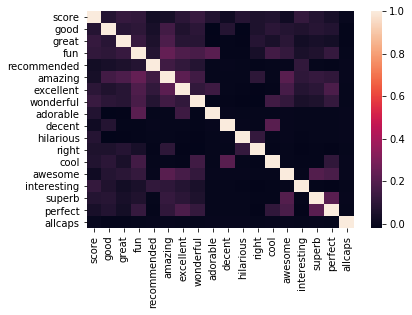

In [32]:
# Visualizing the correlation through a heatmap
sns.heatmap(data.corr()) 

Before running the model, let's build our training data.
- y = dependent variable
- x = independent variable

In [33]:
# Using the titles 'value' and 'target' to specify x and y variables

value = data[keywords + ['allcaps']]
target = data['score']

I will be using the SKLearn Bernoulli classifier since our data contain binary/boolean features.

In [34]:
# Importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(value, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(value)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 274


Our Bernoulli classifier shows that 274 reviews are incorrectly classified. 

Let's now assess the success rate of our classifier through its accuracy score.

In [38]:
# Calculating the accuracy of the model:
from sklearn.metrics import accuracy_score

accuracy_score(target, y_pred)

0.6336898395721925

In [39]:
from sklearn.metrics import accuracy_score

accuracy_score(target, y_pred, normalize=False) # correctly classified messages

474

In [40]:
# Computing the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[338,  24],
       [250, 136]])

Given that we received an accuracy score of 63% for the positive reviews (474/748), let use this score to test with other classifiers to see how well it translates from the context to another.

# Amazon dataset

In [2]:
import os 
path = "/home/kaneeshadawood/amazon_cells_labelled.txt"

In [3]:
# Loading the dataset:
data_path = ("/home/kaneeshadawood/amazon_cells_labelled.txt")
df = pd.read_csv(data_path, delimiter= '\t', header=None)

#Score is either 1 (for positive) or 0 (for negative)
df.columns = ['review', 'score']

In [4]:
df.head()

,review,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [7]:
count = df['score'].value_counts()
count

1    500
0    500
Name: score, dtype: int64

In [8]:
# Ratio of reviews:
count / df['score'].value_counts().sum()

1    0.5
0    0.5
Name: score, dtype: float64

In [10]:
# Let's choose some keywords and add spaces around the key so we're getting the word and not pattern matching.

keywords = ['good', 'great', 'fun', 'excellent', 'impressed', 'recommend', 'beautiful','decent', 'fantastic',
            'right', 'comfortable']

for key in keywords:
    df[str(key)] = df.review.str.contains(' ' + str(key) + ' ', case=False)
    df[str(key)] = df.review.str.contains((str(key) + ' '), case=False)
    df[str(key)] = df.review.str.contains((' ' + str(key)), case=False)

In [11]:
# Let's find if all the reviews are uppercase:
df['allcaps'] = df.review.str.isupper() 

In [12]:
# Let's now convert the score columns into a Boolean value to perform statistics:
df['score'] = (df['score'] == 1)

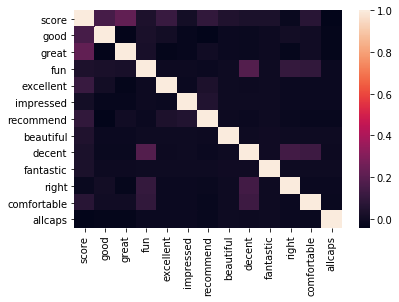

In [13]:
sns.heatmap(df.corr())

In [14]:
# Let's specify x and y variables with the titles 'data' and 'target'

data = df[keywords + ['allcaps']]
target = df['score']

In [15]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    df.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 376


In [16]:
# Calculating the accuracy of the model:
from sklearn.metrics import accuracy_score

accuracy_score(target, y_pred)

0.624

When we first assessed our scores according to Boolean values it shows 50/50 for positive and negative reviews.However, using the Bernoulli classifier, we derived with an accuracy score of 62.4% with 624 correctly classified reiews.

# Summary

- The accuracy score for IMDB reviews is 63% which means that 474 out of 748 reviews are labelled positive.
- The for Amazon is 62.4% which is slightly lower than the IMDB dataset. 
- On average the IMDB and Amazon datasets are performing the same level of accuracy.